In [101]:
from local_steady_ar import normal_ar
import numpy as np
import wave
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.style.use('seaborn-darkgrid')
plt.rcParams['font.family'] = 'Yu Gothic'
plt.rcParams['font.size'] = 17

In [102]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
gabbakick = wave.open('gabbakick test.wav', 'r')
buf = gabbakick.readframes(gabbakick.getnframes())

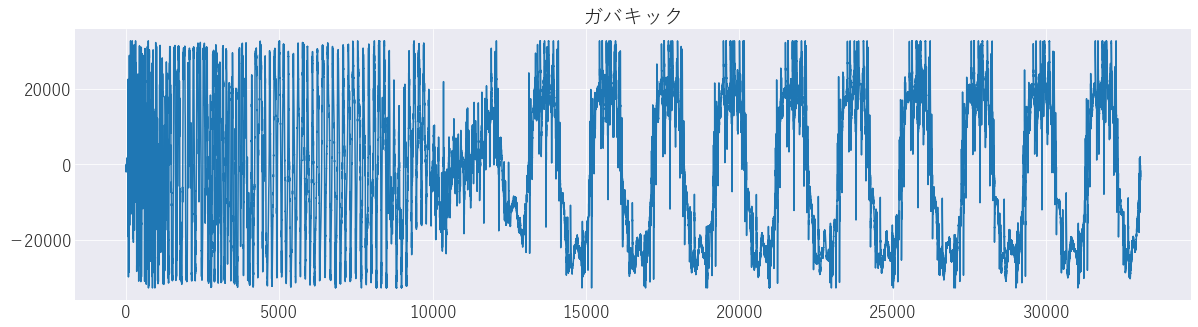

In [3]:
data = np.frombuffer(buf, dtype='int16')
with mpl.rc_context():
    mpl.rc('figure', figsize=(20, 5))
    plt.plot(data)
    plt.title('ガバキック')

## とりあえず生のまま宛ててみる

In [6]:
aics, arrays = normal_ar(data, 2500, 50)

1 回目
AIC_0 = 47517.151194645834
初回
2 回目
AIC_D = 90107.71364979495 AIC_P = 92462.28401399357
AIC_D を採択
3 回目
AIC_D = 84560.83252028422 AIC_P = 84862.52199936706
AIC_D を採択
4 回目
AIC_D = 85638.65649301097 AIC_P = 86455.63772035386
AIC_D を採択
5 回目
AIC_D = 88378.55647453552 AIC_P = 88951.23982558103
AIC_D を採択
6 回目
AIC_D = 89580.24705029033 AIC_P = 89610.481069785
AIC_D を採択
7 回目
AIC_D = 90878.11740564462 AIC_P = 90996.68316856271
AIC_D を採択
8 回目
AIC_D = 92053.32047972063 AIC_P = 92043.18575412707
AIC_P を採択
9 回目
AIC_D = 137863.68140790734 AIC_P = 137815.376840811
AIC_P を採択
10 回目
AIC_D = 183245.06713077944 AIC_P = 183245.69960293875
AIC_D を採択
11 回目
AIC_D = 91229.35671119997 AIC_P = 91202.78566919416
AIC_P を採択
12 回目
AIC_D = 136924.15773338225 AIC_P = 136867.53505463488
AIC_P を採択
13 回目
AIC_D = 182769.33542438803 AIC_P = 182713.281604795
AIC_P を採択
分割数 = 8


In [105]:
pre_length = 50
length_array = []
for array in arrays:
    length = len(array)
    length_array.append(np.arange(pre_length, pre_length + length))
    pre_length += length

In [106]:
length_array

[array([  50,   51,   52, ..., 2547, 2548, 2549]),
 array([2550, 2551, 2552, ..., 5047, 5048, 5049]),
 array([5050, 5051, 5052, ..., 7547, 7548, 7549]),
 array([ 7550,  7551,  7552, ..., 10047, 10048, 10049]),
 array([10050, 10051, 10052, ..., 12547, 12548, 12549]),
 array([12550, 12551, 12552, ..., 15047, 15048, 15049]),
 array([15050, 15051, 15052, ..., 22547, 22548, 22549]),
 array([22550, 22551, 22552, ..., 32547, 32548, 32549])]

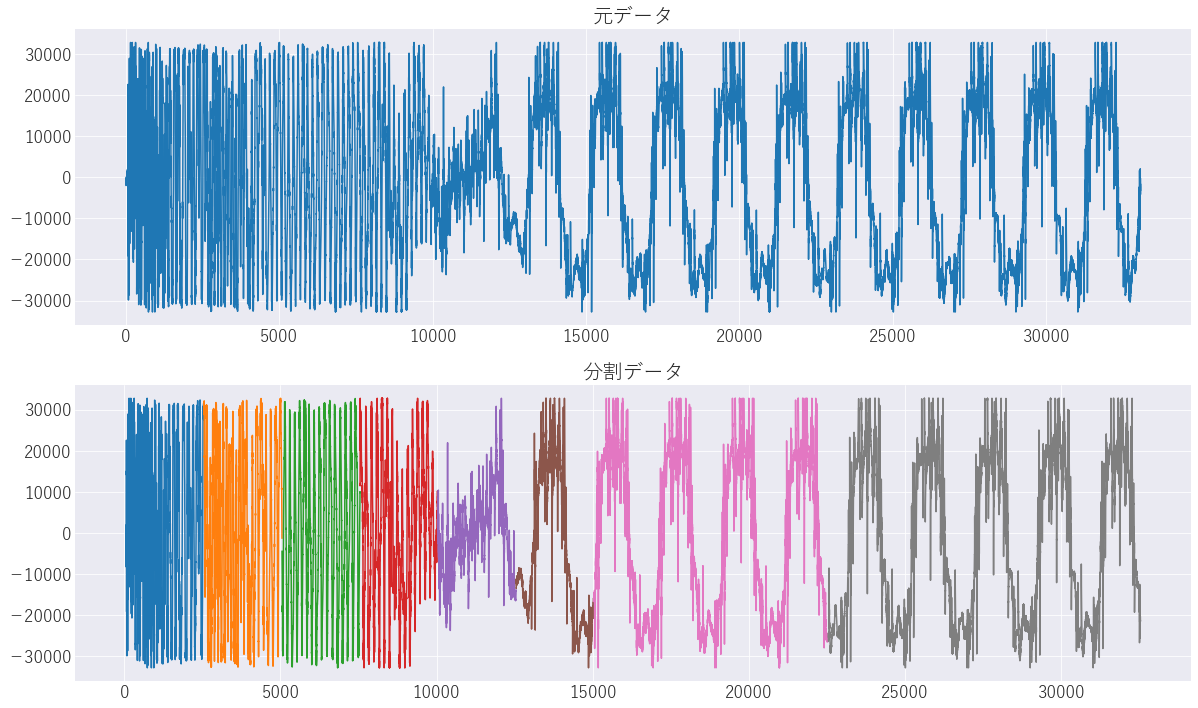

In [9]:
# 結果比較
plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.plot(data)
plt.title('元データ')
plt.subplot(212)
for i in range(len(arrays)):
    plt.plot(length_array[i], arrays[i])
plt.title('分割データ')
plt.savefig('ガバキック分割.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

## もっと良くする方法案
- 移動平均
- データを間引き

In [14]:
import pandas as pd

In [33]:
rolling_number = 100
data1 = np.array(pd.Series(data).rolling(rolling_number, center=False).mean())
data1

array([     nan,      nan,      nan, ..., -9192.69, -9049.63, -8945.91])

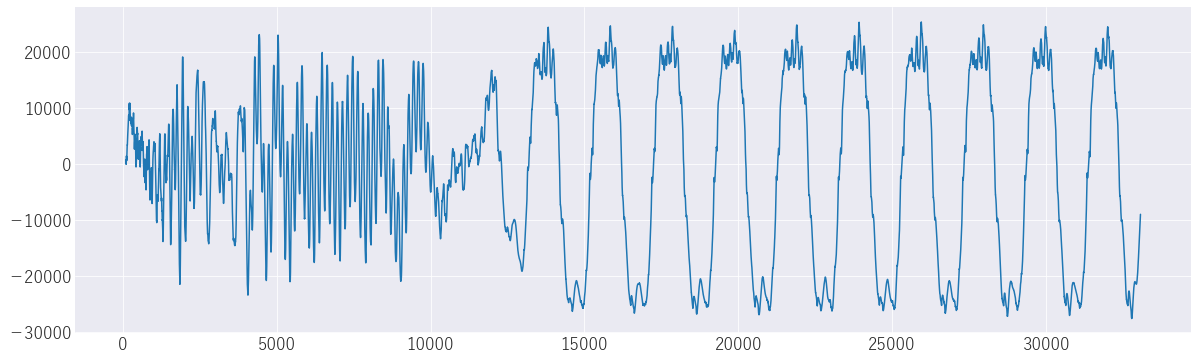

In [34]:
plt.figure(figsize=(20, 6))
plt.plot(data1)
plt.show()

In [36]:
aics1, arrays1 = normal_ar(data1[~np.isnan(data1)], 2500, 50)

1 回目
AIC_0 = 28633.43023663556
初回
2 回目
AIC_D = 52286.399535880635 AIC_P = 56196.66592092926
AIC_D を採択
3 回目
AIC_D = 48836.42336078062 AIC_P = 45635.53134713165
AIC_P を採択
4 回目
AIC_D = 68119.39821379933 AIC_P = 68753.9622963189
AIC_D を採択
5 回目
AIC_D = 46337.74665140719 AIC_P = 46393.636357735
AIC_D を採択
6 回目
AIC_D = 47844.143013183144 AIC_P = 47620.63881999844
AIC_P を採択
7 回目
AIC_D = 74709.64429424427 AIC_P = 72451.63323605774
AIC_P を採択
8 回目
AIC_D = 97322.85743650308 AIC_P = 97238.94651795346
AIC_P を採択
9 回目
AIC_D = 123480.77929481948 AIC_P = 121681.36218422333
AIC_P を採択
10 回目
AIC_D = 146537.21971494748 AIC_P = 145782.76173471415
AIC_P を採択
11 回目
AIC_D = 172230.61296175976 AIC_P = 170344.6496851978
AIC_P を採択
12 回目
AIC_D = 195220.6683815333 AIC_P = 194784.685625541
AIC_P を採択
13 回目
AIC_D = 220377.58325393847 AIC_P = 219327.4956879809
AIC_P を採択
分割数 = 4


In [37]:
pre_length = 50 + (rolling_number - 1)
length_array = []
for array in arrays1:
    length = len(array)
    length_array.append(np.arange(pre_length, pre_length + length))
    pre_length += length

In [104]:
length_array

[array([ 149,  150,  151, ..., 2646, 2647, 2648]),
 array([2649, 2650, 2651, ..., 7646, 7647, 7648]),
 array([ 7649,  7650,  7651, ..., 10146, 10147, 10148]),
 array([10149, 10150, 10151, ..., 32646, 32647, 32648])]

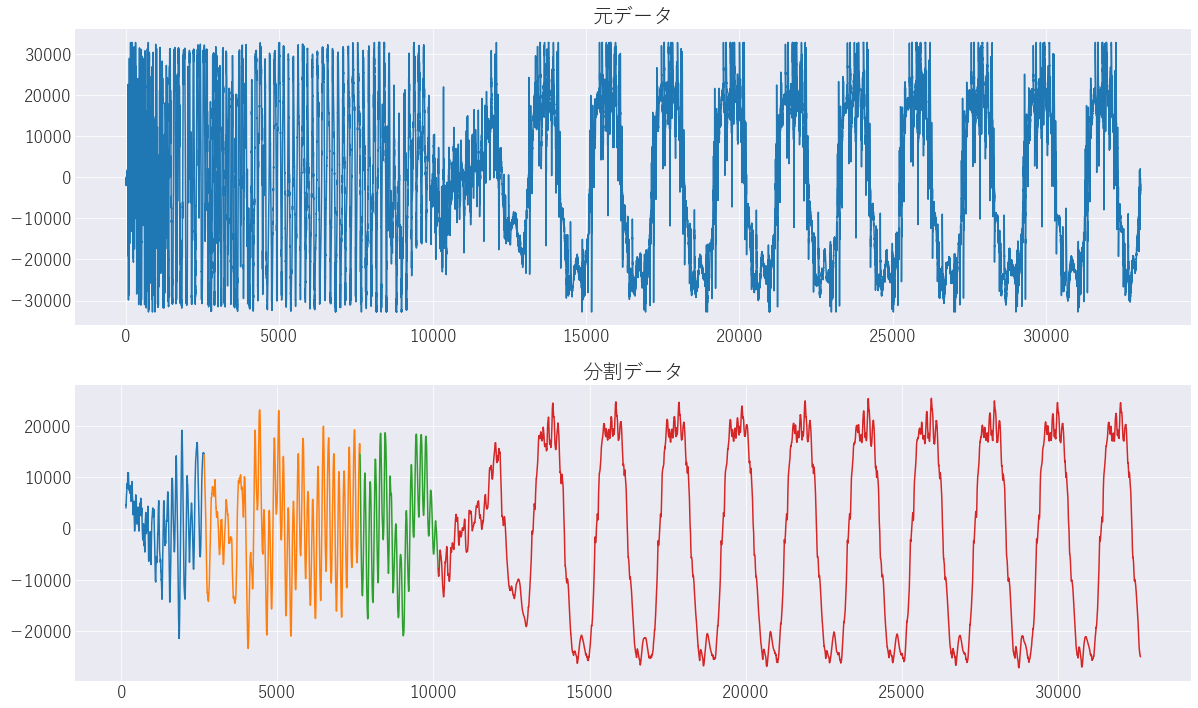

In [38]:
# 結果比較
plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.plot(data)
plt.title('元データ')
plt.subplot(212)
for i in range(len(arrays1)):
    plt.plot(length_array[i], arrays1[i])
plt.title('分割データ')
# plt.savefig('ガバキック分割.png', bbox_inches='tight', pad_inches=0.3)
plt.show()

## まぁまぁそこそこ
- 移動平均100っていうのはサンプルレートを÷100したのと似てる？
- 

In [52]:
import librosa
import soundfile as sf

In [140]:
y, sr = librosa.core.load('gabbakick test.wav', sr=10000, mono=True)
sf.write('441gabbakick test.wav', y, sr, subtype='PCM_16')

In [171]:
# 441Hz版を読み込む
gabbakick_441 = wave.open('441gabbakick test.wav', 'r')
print(gabbakick_441.getframerate())
buf2 = gabbakick_441.readframes(gabbakick_441.getframerate())
data2 = np.frombuffer(buf2, dtype='int16')

10000


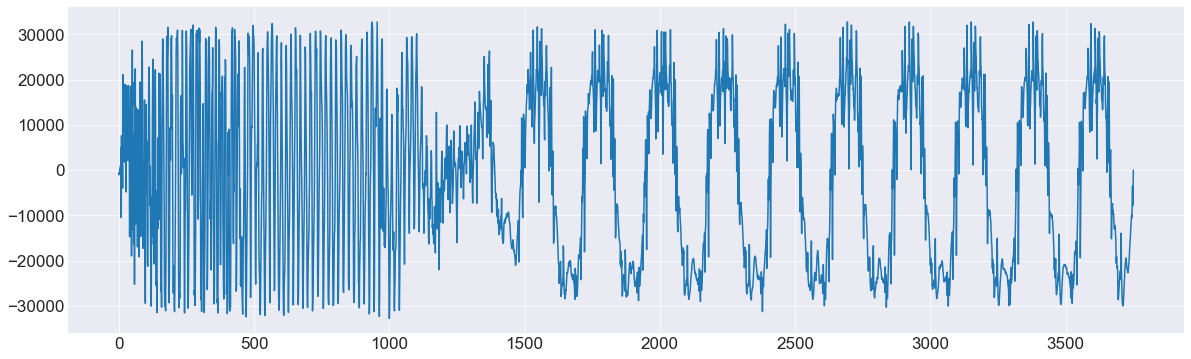

In [172]:
plt.figure(figsize=(20, 6))
plt.plot(data2)
plt.show()

1 回目
AIC_0 = 10533.550355063164
初回
2 回目
AIC_D = 20238.71436951183 AIC_P = 20610.49221905772
AIC_D を採択
3 回目
AIC_D = 19286.53037438305 AIC_P = 19305.405793640446
AIC_D を採択
4 回目
AIC_D = 19297.397163234004 AIC_P = 19316.099346533545
AIC_D を採択
5 回目
AIC_D = 19396.298178248086 AIC_P = 19359.95958992403
AIC_P を採択
6 回目
AIC_D = 28991.507173988066 AIC_P = 28957.918405775046
AIC_P を採択
7 回目
AIC_D = 38571.201524575896 AIC_P = 38531.26980427268
AIC_P を採択
分割数 = 4


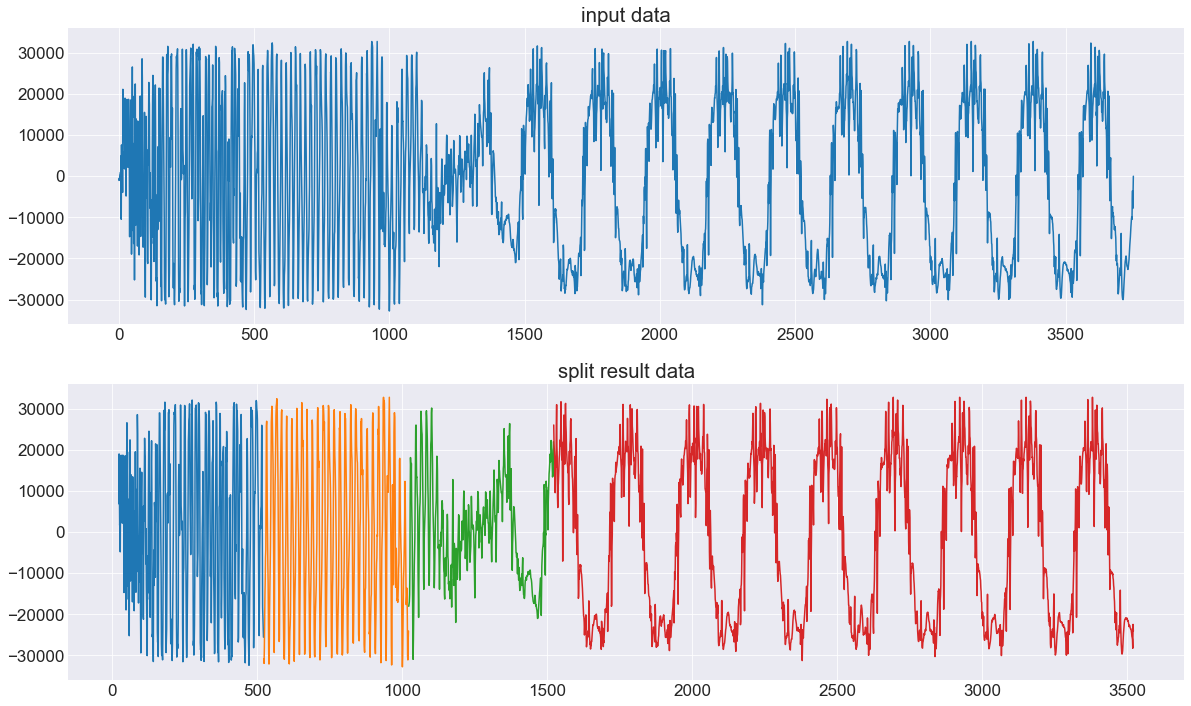

In [147]:
aic2, array2, index_array2 = normal_ar(data2, 500, int(np.sqrt(499)), plot=True)

## 現状
- 受け取った音声データに対して、サンプリングレートをへらすのが良さそう
- 最大次数は限界まで大きくするが、それ以上の周期性のものは難しいね
- 減らして分割区間を推定した後に、どうやって戻す？
    - 1秒間にデータ数いくつ がサンプリングレートなので、分割位置から逆算はできそうだけどね

## 1000Hzで区分けしたデータを44100Hzに戻す
- 1秒に1000データ
- 1秒に44100データ
 - 1000Hzのデータが1進む間に44100は44.1進んでいる
 - それぞれの区分けの開始点を利用すればいい
   - 最初だけ0

In [116]:
# 初回は0、それ以降は各配列の初回index番号を取得
target_indexes = np.array([index_array2[i].min() if i > 0 else 0 for i in range(len(index_array2))])

In [127]:
data_mono = data[::2]

In [128]:
# もともとの44100Hzだった場合の配列index
target_indexes = (target_indexes * (44100 / 1000)).astype(int)
target_indexes

array([   0, 2513, 4718])

In [136]:
row_data_split = []
for i in range(len(target_indexes)):
    print(target_indexes[i])
    if i == len(target_indexes) - 1:
        row_data_split.append(data_mono[target_indexes[i]:])
    else:
        row_data_split.append(data_mono[target_indexes[i]: target_indexes[i + 1]])

0
2513
4718


In [138]:
row_data_split

[array([  -15,  -302, -1140, ..., 24196, 22873, 21648], dtype=int16),
 array([20503, 19498, 18347, ..., 18063, 17515, 15296], dtype=int16),
 array([15130, 13264, 11236, ..., -2314,  -219, -1603], dtype=int16)]

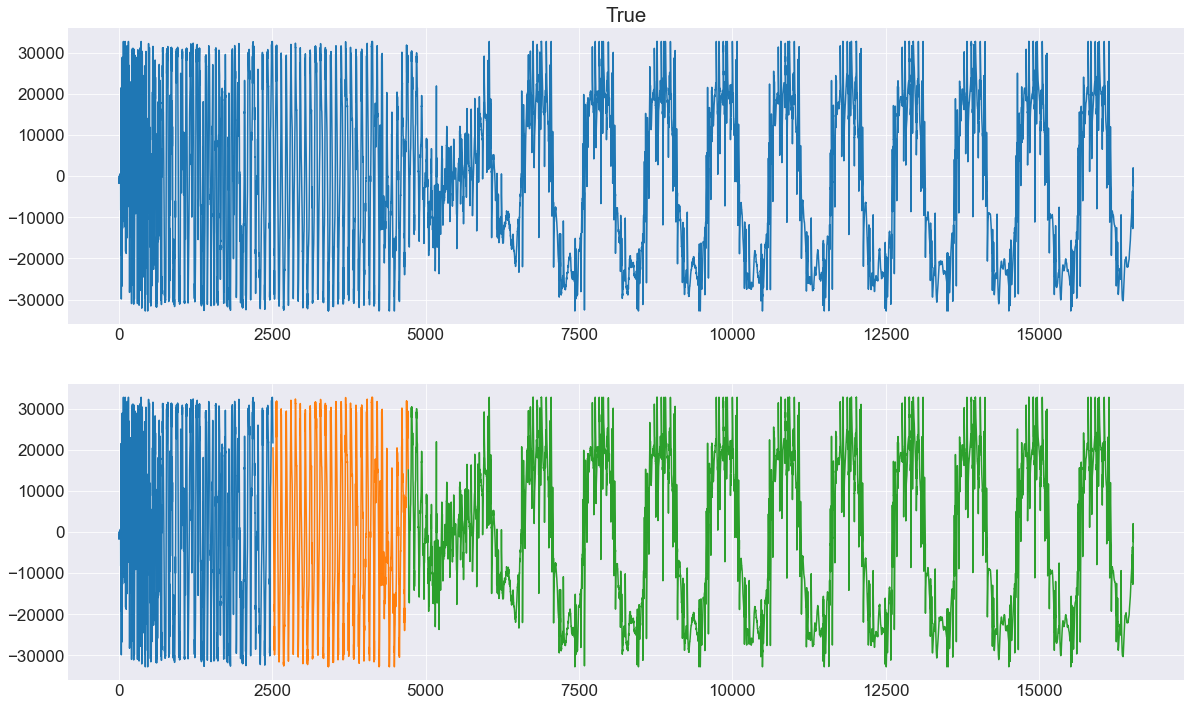

In [139]:
plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.plot(data_mono)
plt.title('True')
plt.subplot(212)
plt.plot(range(0,2513), row_data_split[0])
plt.plot(range(2513, 4718), row_data_split[1])
plt.plot(range(4718, len(data_mono)), row_data_split[2])
plt.show()

## 総括
- 分割モデルはOK
    - σの推定をした場合波の大きさでも検知が変わるのかをチェックするためのデータが必要
        - DAW立ち上げるか
- 適切なサンプリングレートはどこ？
    - 一度これは色々試す
    - 設定分割数はサンプリングレート / 20にしておく
        - このあたりは変えられたほうがいいかもね
        - こまかい周期のものは小さくしたほうが良いし、大きい周期のものはおおきくしたほうがいいからね
    - 最大次数はサンプリングレート / 20 の平方根でいいと思う
- 前処理してからARが走るので、実行したらその前処理も含めて行う→その結果を元に元のデータを分割する
    - このライブラリを作ってから、波形テストしようか
- 使用するライブラリが一部マニアックなため、サンプリングレートを落とす方法を他に考える

### サンプリングレートをマニアックなライブラリを使わずに落とす方法
- scipy.signal.decimateでOK

In [151]:
gabbakick = wave.open('gabbakick test.wav', 'wb')

In [153]:
gabbakick_resample = gabbakick.setframerate(1000)

In [163]:
from scipy.signal import decimate

In [168]:
decimal_data = decimate(data[::2], int(44100 / 10000) )

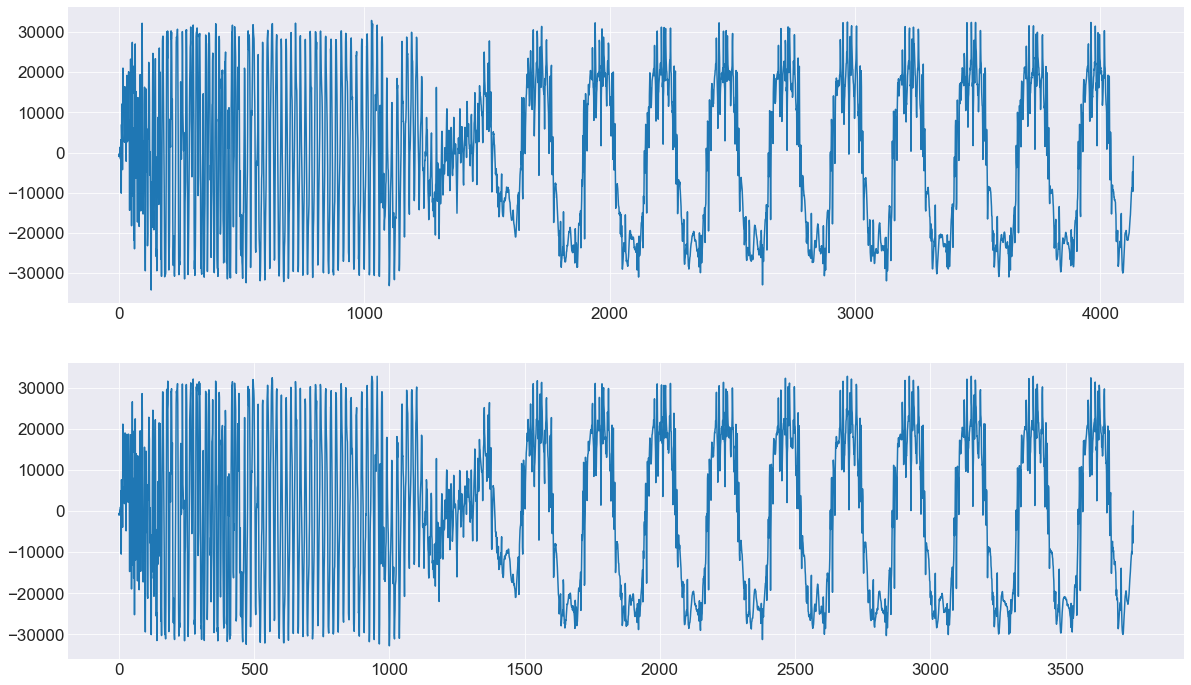

In [169]:
plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.plot(decimal_data)
plt.subplot(212)
plt.plot(data2)
plt.show()

### 余談
- 今まで使ってたデータステレオだったわｗ
  - https://gsmcustomeffects.hatenablog.com/entry/2018/07/30/073640
  - ステレオの場合ヘッダ情報の後はLRLRLRLRと並ぶ

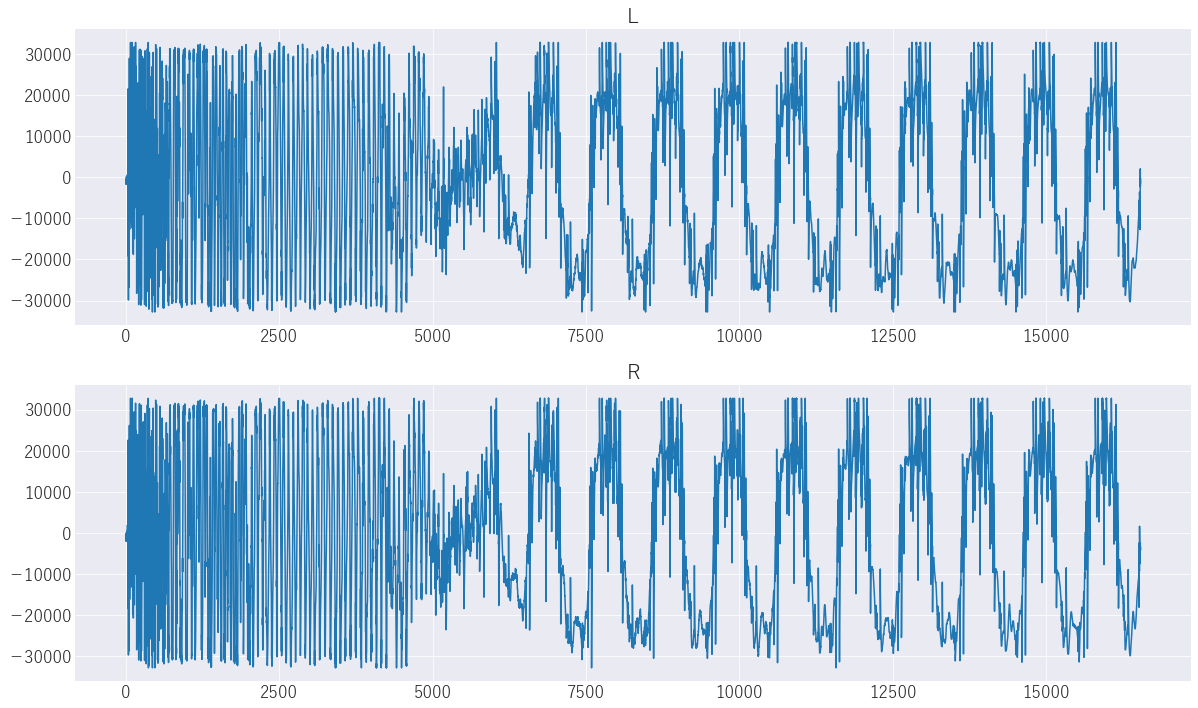

In [75]:
plt.figure(figsize=(20, 12))
plt.subplot(211)
plt.plot(data[::2])
plt.title('L')
plt.subplot(212)
plt.plot(data[1::2])
plt.title('R')
plt.show()